# Sentiment Analysis of tweets on Indian Railways
### Tweets are extracted using twitter api.

In [1]:
"""
@author: Shubham Kumar
"""

import tweepy           # To use Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computation
import matplotlib.pyplot as plt  # For plots
from textblob import TextBlob     #for processing textual data
import re
import seaborn as sns   # For attractive plots

In [2]:
# CREDENTIALS

ckey="CONSUMER KEY"
csecret="CONSUMER SECRET"
atoken="ACCESS TOKEN"
asecret="ACCESS SECRET"

OAUTH_KEYS = {'consumer_key':ckey,'consumer_secret':csecret,'access_token_key':atoken,'access_token_secret':asecret}
auth = tweepy.OAuthHandler(ckey, csecret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
#3200 MAX TWEETS CAN BE EXTRACTED AT A TIME:

tweets = list(tweepy.Cursor(api.search, q="@RailMinIndia").items(3200))
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [4]:
data["Tweets"].duplicated().sum()
duplicates = data.loc[data["Tweets"].duplicated(keep = 'first'), :]
data = data.drop_duplicates(['Tweets'], keep = 'first')
data = data.reset_index(drop=True)

In [5]:
mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 126.38647559337214


In [6]:
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

In [7]:
# FAVOURITE TWEET:

display((data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

'#IndianRailways is slowly changing the way it transports goods in #India. How is it doing this and why 🚂\n\nWatch 👇… https://t.co/WxpeIaT8og'

Number of likes: 469
138 characters.



In [8]:
# MAX RETWEETS:

display((data['Tweets'][rt]))
display((rt_max))
display((data['len'][rt]))	

"RT @sonal_mansingh: World's second and India's first Solar power driven train. @narendramodi government's such revolutionary ideas will not…"

3837

140

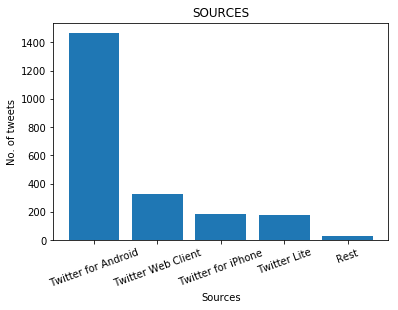

In [9]:
# LOOKED FOR CONTRIBUTION OF SOURCES:

source_counts = {}
for i in data['Source']:
    if i in source_counts:
        source_counts[i] = source_counts[i] +1
    else:
        source_counts[i] = 1
sorted_x = sorted(source_counts.items(), key=operator.itemgetter(1), reverse = True)
clist = [x[1] for x in  sorted(source_counts.items(), key=operator.itemgetter(1), reverse = True)]
rest = sum(clist[5:])

# BAR CHART:

sorted_x = sorted_x[:4]
r = ('Rest', rest)
sorted_x.append(tuple(r))
a,b = map(list,zip(*sorted_x))
plt.figure()
plt.bar(range(len(a)), b, align = 'center')
plt.xticks(range(len(a)), a)
plt.xticks(rotation=20)
plt.xlabel('Sources')
plt.ylabel('No. of tweets')
plt.title('SOURCES')
_=plt.show()

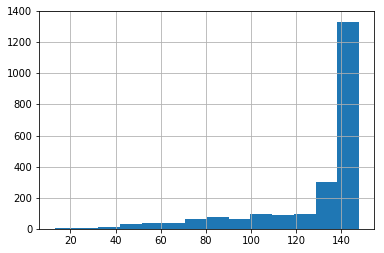

In [13]:
#Number of tweets vs length

data['len'].hist(bins=14)

In [14]:
# CLEANING OF TWEETS:

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [15]:
# ANALYSIS OF TWEETS:

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [16]:
# CREATED A NEW COLUMN WITH THE RESULT OF ANALYSIS:

data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])

In [17]:
# DISPLAYED THE UPDATED DATAFRAME WITH NEW COLUMN :

display(data.head())

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @CantstopulovinM: The second entry of #Pune...,140,1016734868817039360,2018-07-10 17:24:17,Twitter for iPhone,0,13,-1
1,@RailMinIndia we can start a train from pune t...,125,1016734867202236417,2018-07-10 17:24:17,Twitter for Android,0,0,0
2,@WesternRly @Akash_P_Shah @RailMinIndia @Piyus...,86,1016734812835536896,2018-07-10 17:24:04,Twitter Web Client,0,0,0
3,RT @AbhiNathawat: #MumbaiRains 12215 Del Bdts ...,140,1016734769038614528,2018-07-10 17:23:53,Twitter for Android,0,12,1
4,@collectorpal @Palghar_Police @RailMinIndia @P...,139,1016734720799825920,2018-07-10 17:23:42,Twitter for Android,0,0,0


Percentage of positive tweets: 20.51052395879982%
Percentage of neutral tweets: 66.05463502015226%
Percentage de negative tweets: 13.434841021047918%


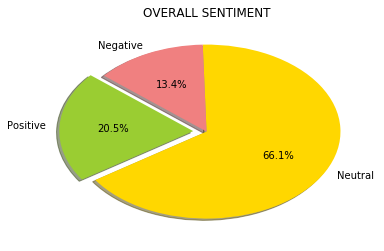

In [18]:
#OVERALL SENTIMENT

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]
a = len(pos_tweets)*100/len(data['Tweets'])
b = len(neu_tweets)*100/len(data['Tweets'])
c = len(neg_tweets)*100/len(data['Tweets'])
print("Percentage of positive tweets: {}%".format(a))
print("Percentage of neutral tweets: {}%".format(b))
print("Percentage de negative tweets: {}%".format(c))

labels = 'Positive', 'Neutral', 'Negative'
colors = [ 'yellowgreen', 'gold', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# PLOT FOR OVERALL SENTIMENT:

senti = [a,b,c]
plt.figure()
plt.pie(senti, explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('OVERALL SENTIMENT')
_=plt.show()

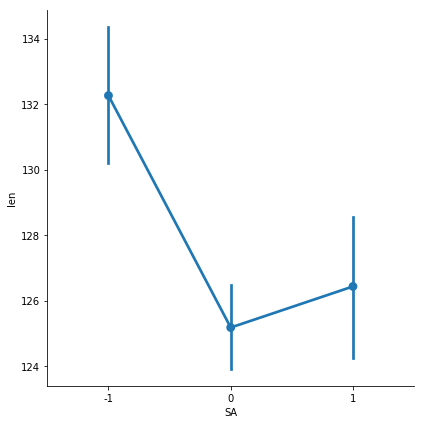

In [19]:
# LENGTH AND SENTIMENT

sns.factorplot('SA','len',data = data, kind = 'point', size = 6)

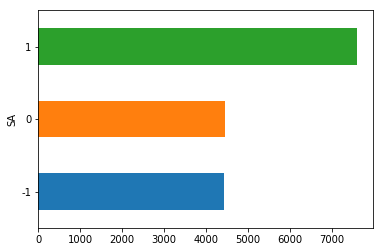

In [20]:
# RTs AND SENTIMENT

data.groupby('SA')['RTs'].sum().plot(kind = 'barh')

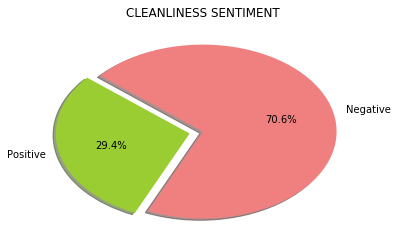

In [21]:
# FOR CLEANLINESS:

cleanliness = []
SA = []
cleani = ['unhygienic', 'clean', 'pure', 'dirty', 'neat', 'sanitation',
          'tidy', 'fresh', 'filthy', 'foul', 'smell', 'toilet']
for i in data['Tweets']:
    for word in cleani:
        if word in i:
            cleanliness.append(i)
            SA.append(analize_sentiment(i))
cleanliness_df = pd.DataFrame({'Tweets': cleanliness, 'SA': SA})


pos_tweets_cleanliness = [ tweet for index, tweet in enumerate(cleanliness_df['Tweets']) if cleanliness_df['SA'][index] > 0]
neg_tweets_cleanliness = [ tweet for index, tweet in enumerate(cleanliness_df['Tweets']) if cleanliness_df['SA'][index] <= 0]

d = len(pos_tweets_cleanliness)*100/len(cleanliness_df['Tweets'])
f = len(neg_tweets_cleanliness)*100/len(cleanliness_df['Tweets'])

# PLOT FOR CLEANLINESS:

labels = 'Positive','Negative'
sent = [d,f]
plt.figure()
plt.pie(sent, explode = (0.1,0), labels=labels, colors=('yellowgreen', 'lightcoral'),
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('CLEANLINESS SENTIMENT')
_=plt.show()

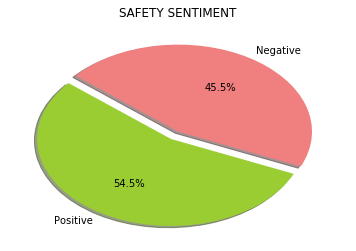

In [22]:
# For SAFETY:

safe = []
SA = []
safie = ['safe', 'secure', 'protect', 'danger', 'hazard', 'risk', 'threat', 'fear']
for i in data['Tweets']:
    for word in safie:
        if word in i:
            safe.append(i)
            SA.append(analize_sentiment(i))
safety_df = pd.DataFrame({'Tweets': safe, 'SA': SA})


pos_tweets_safety = [ tweet for index, tweet in enumerate(safety_df['Tweets']) if safety_df['SA'][index] > 0]
neg_tweets_safety = [ tweet for index, tweet in enumerate(safety_df['Tweets']) if safety_df['SA'][index] <= 0]

d = len(pos_tweets_safety)*100/len(safety_df['Tweets'])
f = len(neg_tweets_safety)*100/len(safety_df['Tweets'])

# PLOT FOR SAFETY:

labels = 'Positive','Negative'
sent = [d,f]
plt.figure()
plt.pie(sent, explode = (0.1,0), labels=labels, colors=('yellowgreen', 'lightcoral'),
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('SAFETY SENTIMENT')
_=plt.show()

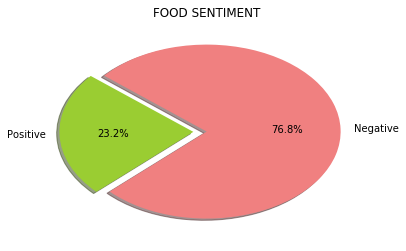

In [23]:
# FOR FOOD:

food = []
SA = []
foodie = ['food', 'nutrition', 'bread', 'cook', 'meal','breakfast','lunch', 'dinner','drink', 'pantry','water']
for i in data['Tweets']:
    for word in foodie:
        if word in i:
            food.append(i)
            SA.append(analize_sentiment(i))
food_df = pd.DataFrame({'Tweets': food, 'SA': SA})

pos_tweets_food = [ tweet for index, tweet in enumerate(food_df['Tweets']) if food_df['SA'][index] > 0]
neg_tweets_food = [ tweet for index, tweet in enumerate(food_df['Tweets']) if food_df['SA'][index] <= 0]

d = len(pos_tweets_food)*100/len(food_df['Tweets'])
f = len(neg_tweets_food)*100/len(food_df['Tweets'])

# PLOT FOR FOOD:

labels = 'Positive','Negative'
sentim = [d,f]
plt.figure()
plt.pie(sentim, explode = (0.1,0), labels=labels, colors=('yellowgreen', 'lightcoral'),
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('FOOD SENTIMENT')
_=plt.show()

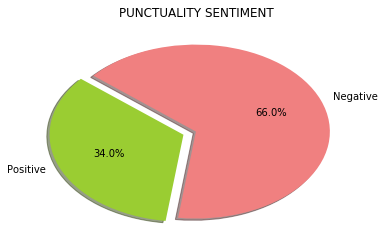

In [24]:
# FOR PUNCTUALITY:

def analize_punctuality(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0.1:
        return 1
    elif analysis.sentiment.polarity < -0.1:
        return -1

punctual = []
SAP = []
plist = ['late', 'delay', 'on time', 'time']
for i in data['Tweets']:
    for word in plist:
        if word in i:
            punctual.append(i)
            SAP.append(analize_sentiment(i))
punctuality_df = pd.DataFrame({'Tweets': punctual, 'SA': SAP})
punctuality_df = punctuality_df.dropna(axis = 0)
punctuality_df = punctuality_df.reset_index(drop = 'true')

pos_tweets_punctuality = [ tweet for index, tweet in enumerate(punctuality_df['Tweets']) if punctuality_df['SA'][index] > 0]
neg_tweets_punctuality = [ tweet for index, tweet in enumerate(punctuality_df['Tweets']) if punctuality_df['SA'][index] < 0]

d = len(pos_tweets_punctuality)*100/len(punctuality_df['Tweets'])
f = len(neg_tweets_punctuality)*100/len(punctuality_df['Tweets'])

# PLOT FOR PUNCTUALITY:

labels = 'Positive','Negative'
senti = [d,f]
plt.figure()
plt.pie(senti, explode = (0.1,0), labels=labels, colors=('yellowgreen', 'lightcoral'),
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('PUNCTUALITY SENTIMENT')
_=plt.show()

In [ ]:
#SAVING TO LOCAL DISK:

data.to_csv("...Twitter\\RAILWAYS.csv", sep =',')